# Orbit Homework

Corinne Wilklow


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import numpy as np

print('done')

done


### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [73]:
# And an inition condition (with everything in SI units)

#r_0 = 147e9 * m
G = 6.674e-11 * N / kg**2 * m**2

m1 = 1.989e30 * kg #mass of sun
m2 = 5.972e24 * kg #mass of earth

t_0 = 0 * s
t_end = 1e7 *s

x_0 = 0 * m
y_0 = 147e9 * m
vx_0 = 0 * m/s
vy_0 = -20 * m/s

init = State(x = x_0, y = y_0 , vx = vx_0, vy = vy_0)

,values
x,0 meter
y,147000000000.0 meter
vx,0.0 meter / second
vy,-20.0 meter / second


In [74]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=G,
                m1=m1,
                r_final=r_sun + r_earth,
                m2=m2,
                t_0=t_0,
                t_end=t_end)

,values
init,x 0 meter y 147000000000....
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,10000000.0 second


In [75]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    r = Vector(x,y)
    angle = r.angle
    force = G * m1 * m2 / r.mag**2 
    
    fx, fy = pol2cart(angle, force)
    Force = Vector(fx,fy)
    return Force

In [76]:
test = Vector(1,1)
test.mag
test.angle

<Quantity(0.7853981633974483, 'radian')>

In [77]:
universal_gravitation(init, system)

<Quantity([2.24639938e+06 3.66864860e+22], 'newton')>

In [78]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)
    
    v = Vector(vx,vy)

    force = universal_gravitation(state, system)
    
    dxdt = vx
    dydt = vy
    print(v.x)
    
    dvxdt = -force.x / m2
    dvydt = -force.y / m2
    print(force.x)
    
    return dxdt, dydt, dvxdt, dvydt

In [79]:
# Always test the slope function!

slope_func(init, 0, system)

0.0 meter / second
2246399.3824401917 newton


(<Quantity(0.0, 'meter / second')>,
 <Quantity(-20.0, 'meter / second')>,
 <Quantity(-3.761552884193221e-19, 'newton / kilogram')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>)

In [80]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, y, vx, vy = state
    r = Vector(x,y)
    return r.y - system.r_final

In [81]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [82]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

0.0 dimensionless
2246399.3824401917 meter ** 2 * newton
-1.7319554108148312e-17 dimensionless
2246399.4105850565 meter ** 2 * newton
-4.35648522616418e-20 dimensionless
2246399.3825109857 meter ** 2 * newton
-6.534727839400723e-20 dimensionless
2246399.382546386 meter ** 2 * newton
-1.7425940905755179e-19 dimensionless
2246399.3827233897 meter ** 2 * newton
-1.936215656208596e-19 dimensionless
2246399.3827548586 meter ** 2 * newton
-2.178242613253736e-19 dimensionless
2246399.3827941953 meter ** 2 * newton
-2.178242613253716e-19 dimensionless
2246399.3827941953 meter ** 2 * newton
-6.534727840104422e-19 dimensionless
2246399.383502265 meter ** 2 * newton
-8.712970455074594e-19 dimensionless
2246399.3838565825 meter ** 2 * newton
-1.960418353165167e-18 dimensionless
2246399.3856284884 meter ** 2 * newton
-2.15403991906181e-18 dimensionless
2246399.385943658 meter ** 2 * newton
-2.3960668764695178e-18 dimensionless
2246399.3863376905 meter ** 2 * newton
-2.3960668764682077e-18 dimension

2.4939382848793047e-11 dimensionless
173667160068.56085 meter ** 2 * newton
4.575250842114275e-11 dimensionless
18280735928.3551 meter ** 2 * newton
4.522534877853349e-11 dimensionless
19756099303.626186 meter ** 2 * newton
4.217343339520474e-11 dimensionless
31504398131.69647 meter ** 2 * newton
4.157456977607121e-11 dimensionless
35377244384.04585 meter ** 2 * newton
4.063518405378846e-11 dimensionless
40624608185.82322 meter ** 2 * newton
4.03908608436775e-11 dimensionless
39782800701.28788 meter ** 2 * newton
3.70462896616184e-11 dimensionless
65779842439.32949 meter ** 2 * newton
3.291521347594739e-11 dimensionless
97554946071.69589 meter ** 2 * newton
-1.8535481521173672e-11 dimensionless
233966897094.95587 meter ** 2 * newton
-6.256441092009382e-11 dimensionless
97712678930.87726 meter ** 2 * newton
-9.112854024589834e-11 dimensionless
749787318865.6508 meter ** 2 * newton
-7.16164965184645e-11 dimensionless
778218748164.7131 meter ** 2 * newton
3.913725080645814e-11 dimensionle

,values
sol,None
t_events,[[5429417.678556412]]
nfev,176
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [83]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(5429417.678556412, 'second')>

In [84]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(62.84048239069921, 'day')>

In [90]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)
details

0.0 dimensionless
2246399.3824401917 meter ** 2 * newton
-1.7319554108148312e-17 dimensionless
2246399.4105850565 meter ** 2 * newton
-4.35648522616418e-20 dimensionless
2246399.3825109857 meter ** 2 * newton
-6.534727839400723e-20 dimensionless
2246399.382546386 meter ** 2 * newton
-1.7425940905755179e-19 dimensionless
2246399.3827233897 meter ** 2 * newton
-1.936215656208596e-19 dimensionless
2246399.3827548586 meter ** 2 * newton
-2.178242613253736e-19 dimensionless
2246399.3827941953 meter ** 2 * newton
-2.178242613253716e-19 dimensionless
2246399.3827941953 meter ** 2 * newton
-6.534727840104422e-19 dimensionless
2246399.383502265 meter ** 2 * newton
-8.712970455074594e-19 dimensionless
2246399.3838565825 meter ** 2 * newton
-1.960418353165167e-18 dimensionless
2246399.3856284884 meter ** 2 * newton
-2.15403991906181e-18 dimensionless
2246399.385943658 meter ** 2 * newton
-2.3960668764695178e-18 dimensionless
2246399.3863376905 meter ** 2 * newton
-2.3960668764682077e-18 dimension

,values
sol,None
t_events,[[5429417.678556412]]
nfev,176
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [91]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [92]:
# Scaling the distance to million km

x = results.x / 1e9;
y = results.y / 1e9;

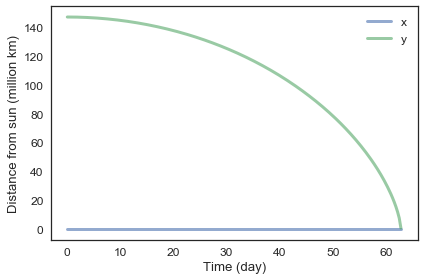

In [93]:
# And plotting

plot(x, label='x')
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

Saving figure to file figs/chap10-fig02.pdf


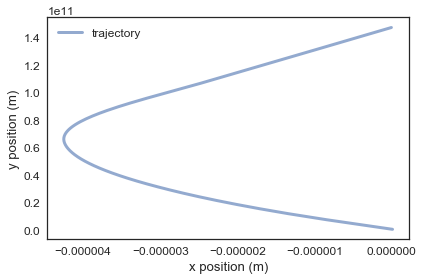

In [94]:
def plot_trajectory(results):
    plot(results.x, results.y, label='trajectory')

    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

plot_trajectory(results)
savefig('figs/chap10-fig02.pdf')